# Week 5 Practical Activities

## 5.1.5 Scraping Covid Data

## Import the libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Create URL and request variables

In [2]:
# Create the variable for the url
url = 'https://www.worldometers.info/coronavirus'

## Establish a connection with the site

In [3]:
# Specify the url and request with get()
r = requests.get(url)

In [4]:
# Test if connection is ok
if r.status_code == 200:
    html_doc = r.text

In [19]:
# View r / check code
print(r)

<Response [200]>


## Create the BeautifulSoup object and print it with preffify()

In [6]:
# Set BeautifulSoup object
soup = BeautifulSoup(html_doc)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
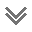

In [7]:
# Print the output with prettify
print(soup.prettify())

## Extract the data from the table

In [18]:
# Find the table by specifying it by it's id title / name (attribute or attrs)
table = soup.find('table', attrs={'id': 'main_table_countries_today'})
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## Extract the table headers

In [20]:
# Specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column
rows = table.find_all('tr', attrs={'style':""})
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>549,151,209</td>
 <td

In [22]:
# Make a list to store the extracted data
output = []

In [23]:
# Specify the column names
column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

In [25]:
# Create a for loop statement to go through each row for 'cases'
for cases in rows:
    cases_data = cases.find_all('td')
    if cases_data:
        # extract the text within each element
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))

# View output
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '549,151,209',
  'Total Deaths': '+172,438',
  'New Deaths': '6,351,238',
  'Total Recovered': '+379',
  'New Recovered': '524,184,337',
  'Active Cases': '+282,320',
  'Serious, Critical': '18,615,634',
  'Tot Cases/ 1M pop': '36,400',
  'Deaths/ 1M pop': '70,451',
  'Total Tests': '814.8',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '88,794,286',
  'Total Deaths': '',
  'New Deaths': '1,040,805 ',
  'Total Recovered': '',
  'New Recovered': '84,513,615',
  'Active Cases': '',
  'Serious, Critical': '3,239,866',
  'Tot Cases/ 1M pop': '3,082',
  'Deaths/ 1M pop': '265,180',
  'Total Tests': '3,108',
  'Tests/ 1M pop': '1,048,569,557',
  'Population': '3,131,505'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '43,407,046',
  'Total Deaths': '',
  'New Deaths': '525,020 ',
  'Total Recovered': '',
  'New Recovered': '42,787,606',
  'Active Ca

## Converted the extracted data into a DataFrame

In [26]:
# Create the DataFrame
data = pd.DataFrame(output)

In [27]:
# View the DataFrame
data.head()

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  549,151,209     +172,438   6,351,238   
1             1         USA   88,794,286               1,040,805    
2             2       India   43,407,046                 525,020    
3             3      Brazil   32,078,638                 670,459    
4             4      France   30,513,713                 149,317    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0            +379   524,184,337     +282,320        18,615,634   
1                    84,513,615                      3,239,866   
2                    42,787,606                         94,420   
3                    30,566,088                        842,091   
4                    29,498,473       +6,184           865,923   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            36,400         70,451       814.8                            
1             3,082        265,180       3,108  1,048,569,557  3,131,505  
2               698         30,854         373    861,015,683    612,010  
3             8,318        148,822       3,110     63,776,166    295,875  
4               869        465,436       2,278    271,490,188  4,141,132

# 5.1.7 Convert, clean and analyse data

### Clean the data

Save the Pandas DataFrame as a csv file

In [28]:
# Save the DataFrame as a CSV file without index.
data.to_csv('cases.csv', index=False)

Create and view a JSON output

In [29]:
# Create a JSON file
import json

In [30]:
# Create a JSON file
output_json = json.dumps(output)

In [31]:
# View the output
output_json

'[{"Country,Other": "", "Total Cases": "World", "New Cases": "549,151,209", "Total Deaths": "+172,438", "New Deaths": "6,351,238", "Total Recovered": "+379", "New Recovered": "524,184,337", "Active Cases": "+282,320", "Serious, Critical": "18,615,634", "Tot Cases/ 1M pop": "36,400", "Deaths/ 1M pop": "70,451", "Total Tests": "814.8", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "1", "Total Cases": "USA", "New Cases": "88,794,286", "Total Deaths": "", "New Deaths": "1,040,805 ", "Total Recovered": "", "New Recovered": "84,513,615", "Active Cases": "", "Serious, Critical": "3,239,866", "Tot Cases/ 1M pop": "3,082", "Deaths/ 1M pop": "265,180", "Total Tests": "3,108", "Tests/ 1M pop": "1,048,569,557", "Population": "3,131,505"}, {"Country,Other": "2", "Total Cases": "India", "New Cases": "43,407,046", "Total Deaths": "", "New Deaths": "525,020 ", "Total Recovered": "", "New Recovered": "42,787,606", "Active Cases": "", "Serious, Critical": "94,420", "Tot Cases/ 1M pop": "698"

In [32]:
# Save the JSON file to .json
with open('cases_json.json', 'w') as f:
    json.dump(output, f)

In [35]:
# Read the JSON using Pandas, output to .csv
pd.read_json(output_json).to_csv('cases_csv.csv', index=False)

Import the new csv files and read them into DataFrames

In [39]:
data_csv = pd.read_csv('cases_csv.csv')
data_json = pd.read_json('cases_json.json')

In [40]:
data_csv.head()

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0            NaN       World  549,151,209     +172,438   6,351,238   
1            1.0         USA   88,794,286          NaN  1,040,805    
2            2.0       India   43,407,046          NaN    525,020    
3            3.0      Brazil   32,078,638          NaN    670,459    
4            4.0      France   30,513,713          NaN    149,317    

   Total Recovered New Recovered Active Cases Serious, Critical  \
0            379.0   524,184,337     +282,320        18,615,634   
1              NaN    84,513,615          NaN         3,239,866   
2              NaN    42,787,606          NaN            94,420   
3              NaN    30,566,088          NaN           842,091   
4              NaN    29,498,473       +6,184           865,923   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            36,400         70,451       814.8            NaN        NaN  
1             3,082        265,180       3,108  1,048,569,557  3,131,505  
2               698         30,854         373    861,015,683    612,010  
3             8,318        148,822       3,110     63,776,166    295,875  
4               869        465,436       2,278    271,490,188  4,141,132

In [41]:
data_json.head()

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  549,151,209     +172,438   6,351,238   
1             1         USA   88,794,286               1,040,805    
2             2       India   43,407,046                 525,020    
3             3      Brazil   32,078,638                 670,459    
4             4      France   30,513,713                 149,317    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0            +379   524,184,337     +282,320        18,615,634   
1                    84,513,615                      3,239,866   
2                    42,787,606                         94,420   
3                    30,566,088                        842,091   
4                    29,498,473       +6,184           865,923   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            36,400         70,451       814.8                            
1             3,082        265,180       3,108  1,048,569,557  3,131,505  
2               698         30,854         373    861,015,683    612,010  
3             8,318        148,822       3,110     63,776,166    295,875  
4               869        465,436       2,278    271,490,188  4,141,132

View columns and dytpes for each DataFrame

In [42]:
print(data_csv.dtypes)
print(data_csv.columns)

Country,Other        float64
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths            object
Total Recovered      float64
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')


In [43]:
print(data_json.dtypes)
print(data_json.columns)

Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop       object
Total Tests          object
Tests/ 1M pop        object
Population           object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')


In [44]:
# Create a subset using the data_csv DataFrame
data_report = data_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

In [45]:
# View the new DataFrame
data_report.head()

Country,Other Total Cases Total Deaths  Total Recovered Active Cases  \
0            NaN       World     +172,438            379.0     +282,320   
1            1.0         USA          NaN              NaN          NaN   
2            2.0       India          NaN              NaN          NaN   
3            3.0      Brazil          NaN              NaN          NaN   
4            4.0      France          NaN              NaN       +6,184   

  Serious, Critical  
0        18,615,634  
1         3,239,866  
2            94,420  
3           842,091  
4           865,923

In [46]:
print(data_report.columns)

Index(['Country,Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical'],
      dtype='object')


Determine the number of missing values

In [47]:
# Determine missing values.
data_report.isnull().sum()

Country,Other          4
Total Cases            0
Total Deaths         322
Total Recovered      384
Active Cases         320
Serious, Critical     34
dtype: int64

Save the new DataFrame as a CSV file

In [48]:
# Save the DataFrame as a CSV file without index.
data_report.to_csv('datareport.csv', index=False)

In [49]:
# View the saved CSV
datareport = pd.read_csv('datareport.csv')

In [50]:
# View the DataFrame
datareport.head()

Country,Other Total Cases Total Deaths  Total Recovered Active Cases  \
0            NaN       World     +172,438            379.0     +282,320   
1            1.0         USA          NaN              NaN          NaN   
2            2.0       India          NaN              NaN          NaN   
3            3.0      Brazil          NaN              NaN          NaN   
4            4.0      France          NaN              NaN       +6,184   

  Serious, Critical  
0        18,615,634  
1         3,239,866  
2            94,420  
3           842,091  
4           865,923